In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [177]:
apps=pd.read_csv(r"D:\Data\Play Store\archive\googleplaystore.csv")

In [178]:
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [179]:
len(apps)

10841

In [180]:
apps.shape

(10841, 13)

In [181]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [182]:
apps.drop_duplicates(inplace=True)

In [183]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [184]:
chars_to_remove = ["+",",","$"]
cols_to_clean = ["Installs","Price"]

for col in cols_to_clean:

    for char in chars_to_remove:
        apps[col] = apps[col].apply(lambda x: x.replace(char,""))

In [185]:
print(apps.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None


In [186]:
apps["Price"].sort_values()

0               0
7220            0
7221            0
7222            0
7223            0
           ...   
5475         9.99
9409         9.99
9294         9.99
6180         9.99
10472    Everyone
Name: Price, Length: 10358, dtype: object

In [187]:
apps["Price"]=apps["Price"].replace("Everyone",0)

In [188]:
apps["Price"].value_counts()

0         9592
0.99       146
2.99       125
1.99        73
4.99        70
          ... 
389.99       1
19.90        1
1.75         1
14.00        1
1.04         1
Name: Price, Length: 93, dtype: int64

In [189]:
apps["Price"] = apps["Price"].astype(float)

In [190]:
apps["Price"].sort_values()

0         0.00
7220      0.00
7221      0.00
7222      0.00
7223      0.00
         ...  
5354    399.99
5373    399.99
5362    399.99
4362    399.99
4367    400.00
Name: Price, Length: 10358, dtype: float64

In [191]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  float64
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [192]:
apps["Installs"].sort_values()

9934             0
6692             0
8871             0
9905             0
9719             0
           ...    
1662     500000000
3888     500000000
3934     500000000
3265     500000000
10472         Free
Name: Installs, Length: 10358, dtype: object

In [193]:
apps["Installs"].value_counts()

1000000       1488
10000000      1132
100000        1129
10000         1033
1000           890
100            710
5000000        683
500000         517
50000          474
5000           469
10             385
100000000      369
500            328
50000000       272
50             204
5               82
1               67
500000000       61
1000000000      49
0               15
Free             1
Name: Installs, dtype: int64

In [194]:
apps["Installs"]=apps["Installs"].replace("Free",0)

In [195]:
apps["Installs"] = apps["Installs"].astype(float)


In [196]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  float64
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  float64
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.1+ MB


In [197]:
apps.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [198]:
apps.Category.replace("1.9",'LIFESTYLE',inplace=True)

In [199]:
apps.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [200]:
print('Number of categories = ', len(apps.Category.unique()))

Number of categories =  33


In [201]:
num_apps_in_category=apps.Category.value_counts()
num_apps_in_category

FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               374
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

In [202]:
sorted_num_apps_in_category = num_apps_in_category.sort_values()
sorted_num_apps_in_category

BEAUTY                   53
PARENTING                60
COMICS                   60
EVENTS                   64
ART_AND_DESIGN           65
HOUSE_AND_HOME           80
WEATHER                  82
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
ENTERTAINMENT           111
FOOD_AND_DRINK          124
EDUCATION               130
MAPS_AND_NAVIGATION     137
VIDEO_PLAYERS           175
DATING                  196
SHOPPING                224
BOOKS_AND_REFERENCE     230
TRAVEL_AND_LOCAL        237
NEWS_AND_MAGAZINES      264
SOCIAL                  280
HEALTH_AND_FITNESS      306
PHOTOGRAPHY             322
SPORTS                  351
FINANCE                 360
COMMUNICATION           366
LIFESTYLE               374
PERSONALIZATION         388
PRODUCTIVITY            407
MEDICAL                 408
BUSINESS                427
TOOLS                   843
GAME                   1121
FAMILY                 1943
Name: Category, dtype: int64

In [203]:
apps.Category.value_counts().index

Index(['FAMILY', 'GAME', 'TOOLS', 'BUSINESS', 'MEDICAL', 'PRODUCTIVITY',
       'PERSONALIZATION', 'LIFESTYLE', 'COMMUNICATION', 'FINANCE', 'SPORTS',
       'PHOTOGRAPHY', 'HEALTH_AND_FITNESS', 'SOCIAL', 'NEWS_AND_MAGAZINES',
       'TRAVEL_AND_LOCAL', 'BOOKS_AND_REFERENCE', 'SHOPPING', 'DATING',
       'VIDEO_PLAYERS', 'MAPS_AND_NAVIGATION', 'EDUCATION', 'FOOD_AND_DRINK',
       'ENTERTAINMENT', 'AUTO_AND_VEHICLES', 'LIBRARIES_AND_DEMO', 'WEATHER',
       'HOUSE_AND_HOME', 'ART_AND_DESIGN', 'EVENTS', 'PARENTING', 'COMICS',
       'BEAUTY'],
      dtype='object')

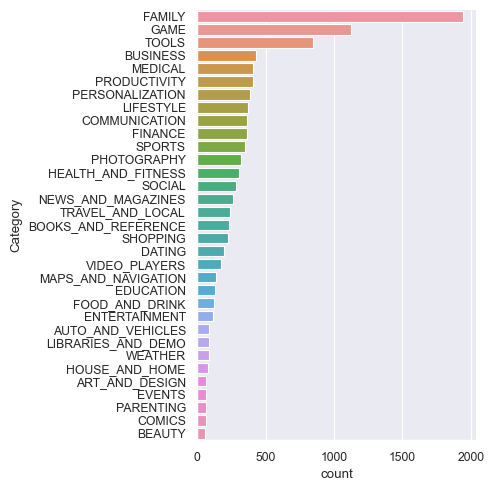

In [204]:
sns.set_style("darkgrid")
sns.set_context("paper")
sns.catplot(y="Category",data=apps,kind="count",order=apps.Category.value_counts().index)
plt.show()

In [205]:
sns.set_style()

In [206]:
sns.axes_style()

{'axes.facecolor': '#EAEAF2',
 'axes.edgecolor': 'white',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': 'white',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': <CapStyle.round: 'round'>,
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

In [207]:
sns.axes_style

<function seaborn.rcmod.axes_style(style=None, rc=None)>

In [208]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  float64
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  float64
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.1+ MB


In [209]:
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [210]:
avg_app_rating=apps.Rating.mean()
print('Average app rating = ', avg_app_rating)

Average app rating =  4.189542336669298


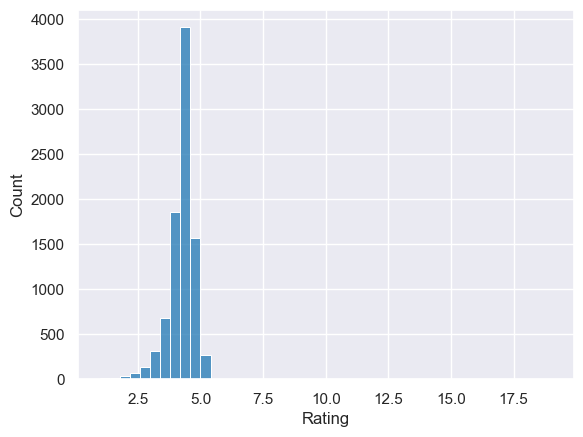

In [212]:
sns.set_context("notebook")
sns.histplot(x="Rating",data=apps,binwidth=0.4)
plt.show()

In [214]:
apps.Rating.sort_values(ascending=False)

10472    19.0
5139      5.0
6851      5.0
6807      5.0
6816      5.0
         ... 
10824     NaN
10825     NaN
10831     NaN
10835     NaN
10838     NaN
Name: Rating, Length: 10358, dtype: float64

In [215]:
apps.Rating.replace(19.0,5,inplace=True)

In [216]:
apps.Rating.sort_values(ascending=False)

5139     5.0
8582     5.0
6807     5.0
6816     5.0
6823     5.0
        ... 
10824    NaN
10825    NaN
10831    NaN
10835    NaN
10838    NaN
Name: Rating, Length: 10358, dtype: float64

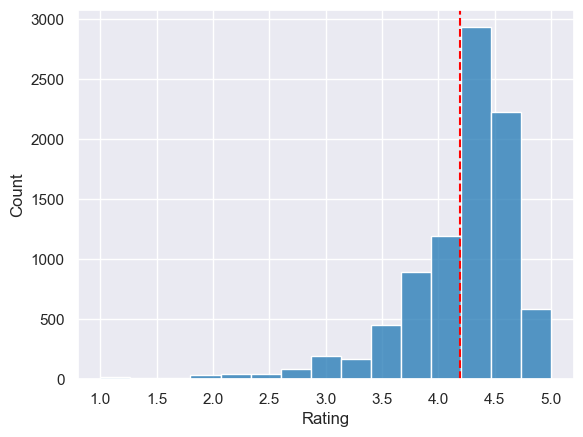

In [218]:
sns.histplot(x="Rating",data=apps,bins=15)
plt.axvline(x=apps.Rating.mean(),
            color='red',
            ls='--', 
            lw=1.5)
sns.set_style("darkgrid")
plt.show()

In [234]:
apps["Size"] = apps["Size"].apply(lambda x: x.replace("M",""))

In [238]:
apps.Size.value_counts()

Varies with device    1526
11                     188
12                     186
13                     186
14                     182
                      ... 
430k                     1
429k                     1
200k                     1
460k                     1
619k                     1
Name: Size, Length: 462, dtype: int64

In [237]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  float64
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  float64
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.1+ MB


In [87]:
pd.read_csv(r"D:\Data\Play Store\archive\googleplaystore_user_reviews.csv")

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
